In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from game.Bankgames import *
from game.plotting import *
from game.distributions import TruncatedGaussian

In [14]:
# game1.A

In [3]:
# Define parameters
gammas = [0.1, 0.4]
taus = sorted([1/(2+gamma) for gamma in gammas])

# 0 (gamma_l, tau_l), 1(gamma_l, tau_h), 2(gamma_h, tau_l), 3(gamma_h, tau_h)
tg = TruncatedGaussian(mu = 0.6, sigma = 0.2)

# Create results list as you did
results = []


# # First game with true matrix
# game1 = GameTrueMatrix(gammas=gammas, taus=taus, dist = tg)
# results.append(game1.run_hedge(T=10000, p_b1=np.array([.2, .4, .1, .3]), 
#                             p_b2=np.array([.2, .4, .1, .3]), 
#                             eta=0.1))

# # Second game
# game2 = GameTrueMatrix(gammas, taus, dist = tg)
# results.append(game2.run_hedge(T=10000, p_b1=np.array([.1, .1, .1, .7]), 
#                             p_b2=np.array([.2, .5, .2, .1]), 
#                             eta=0.1))

In [9]:
bank_1_vec[:, 0] / bank_1_vec[:,2]

array([2.        , 1.99902113, 1.99804347, ..., 0.01677319, 0.01676415,
       0.0167551 ])

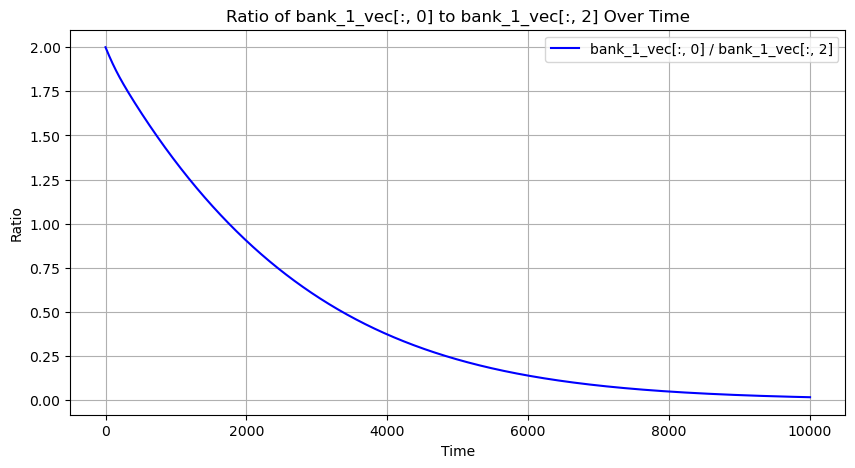

In [10]:
time = np.arange(bank_1_vec.shape[0])  # Generate a time axis based on the number of rows
ratio = bank_1_vec[:, 0] / bank_1_vec[:, 2]  # Compute the ratio

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(time, ratio, label="bank_1_vec[:, 0] / bank_1_vec[:, 2]", color="b")
plt.xlabel("Time")
plt.ylabel("Ratio")
plt.title("Ratio of bank_1_vec[:, 0] to bank_1_vec[:, 2] Over Time")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

(<Figure size 1500x1000 with 2 Axes>,
 array([[<Axes: title={'center': 'Game 1'}, xlabel='Time Step', ylabel='Probability'>,
         <Axes: title={'center': 'Game 2'}, xlabel='Time Step', ylabel='Probability'>]],
       dtype=object))

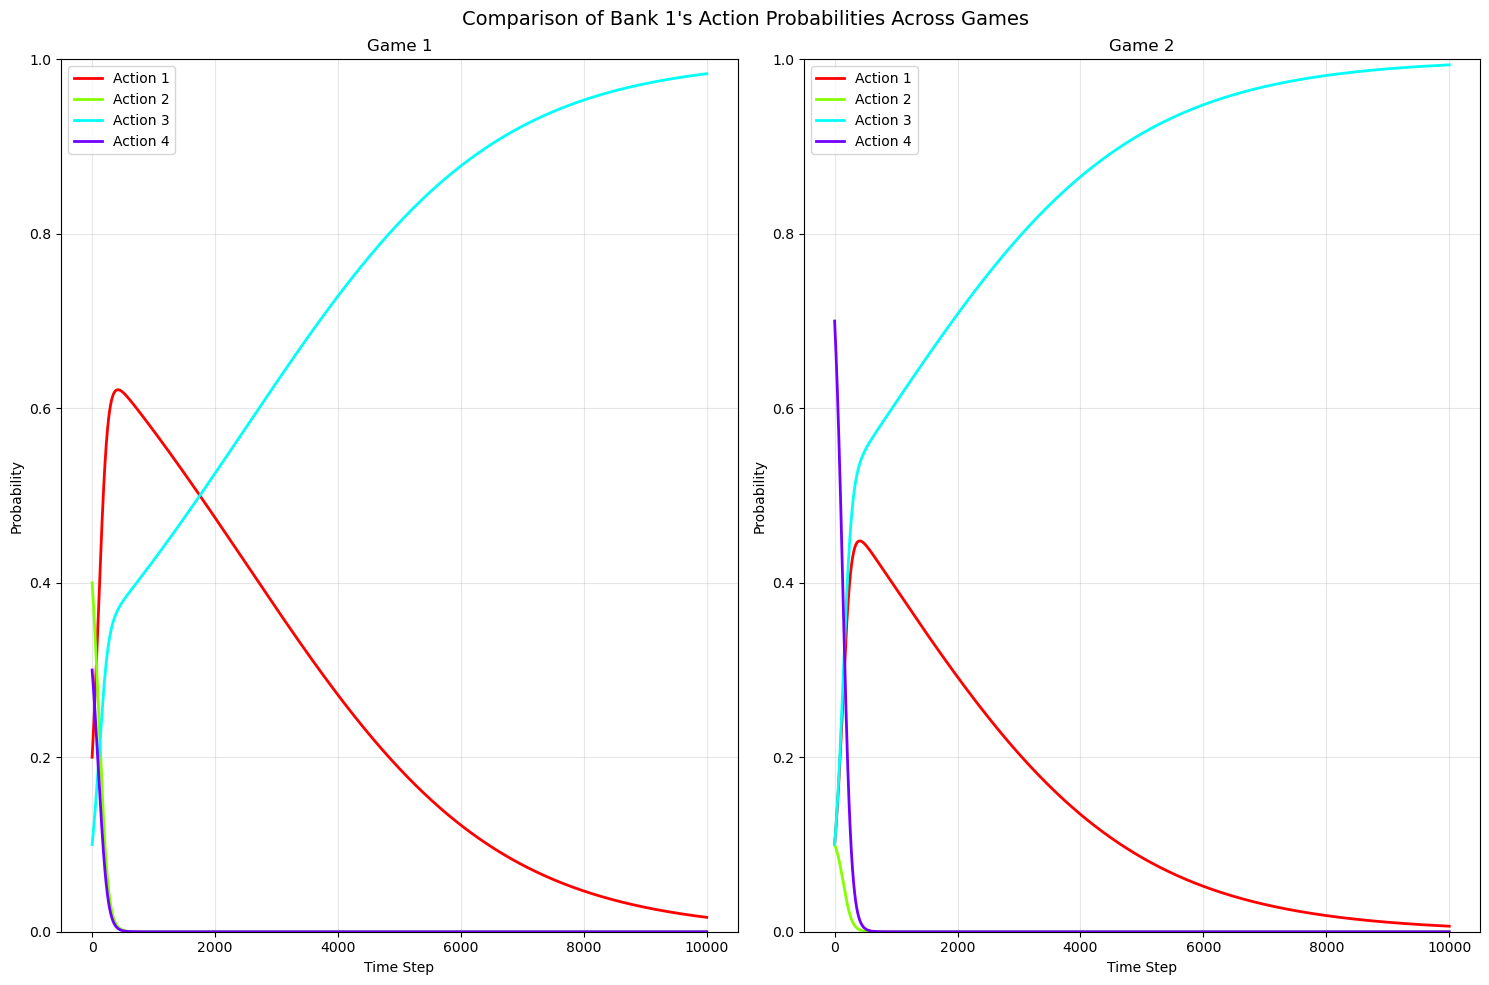

In [4]:
plot_game_probability_comparison(results)

In [17]:
results = []
T = 10000
# p_b1=np.array([.2, .4, .1, .3])
# p_b2=np.array([.2, .4, .1, .3])

p_b1=np.array([.1, .1, .1, .7])
p_b2=np.array([.2, .5, .2, .1])


eta = 0.1
              
game1 = GameTrueMatrix(gammas=gammas, taus=taus, dist = tg)
results.append(game1.run_hedge(T=T, p_b1=p_b1, p_b2=p_b2, eta=eta))

game1_samp = GameFreshEstimate(gammas=gammas, taus=taus, dist = tg, num_samples = 10)
results.append(game1_samp.run_hedge(T=T, p_b1=p_b1, p_b2=p_b2, eta=eta))

(<Figure size 1500x1000 with 2 Axes>,
 array([[<Axes: title={'center': 'Game 1'}, xlabel='Time Step', ylabel='Probability'>,
         <Axes: title={'center': 'Game 2'}, xlabel='Time Step', ylabel='Probability'>]],
       dtype=object))

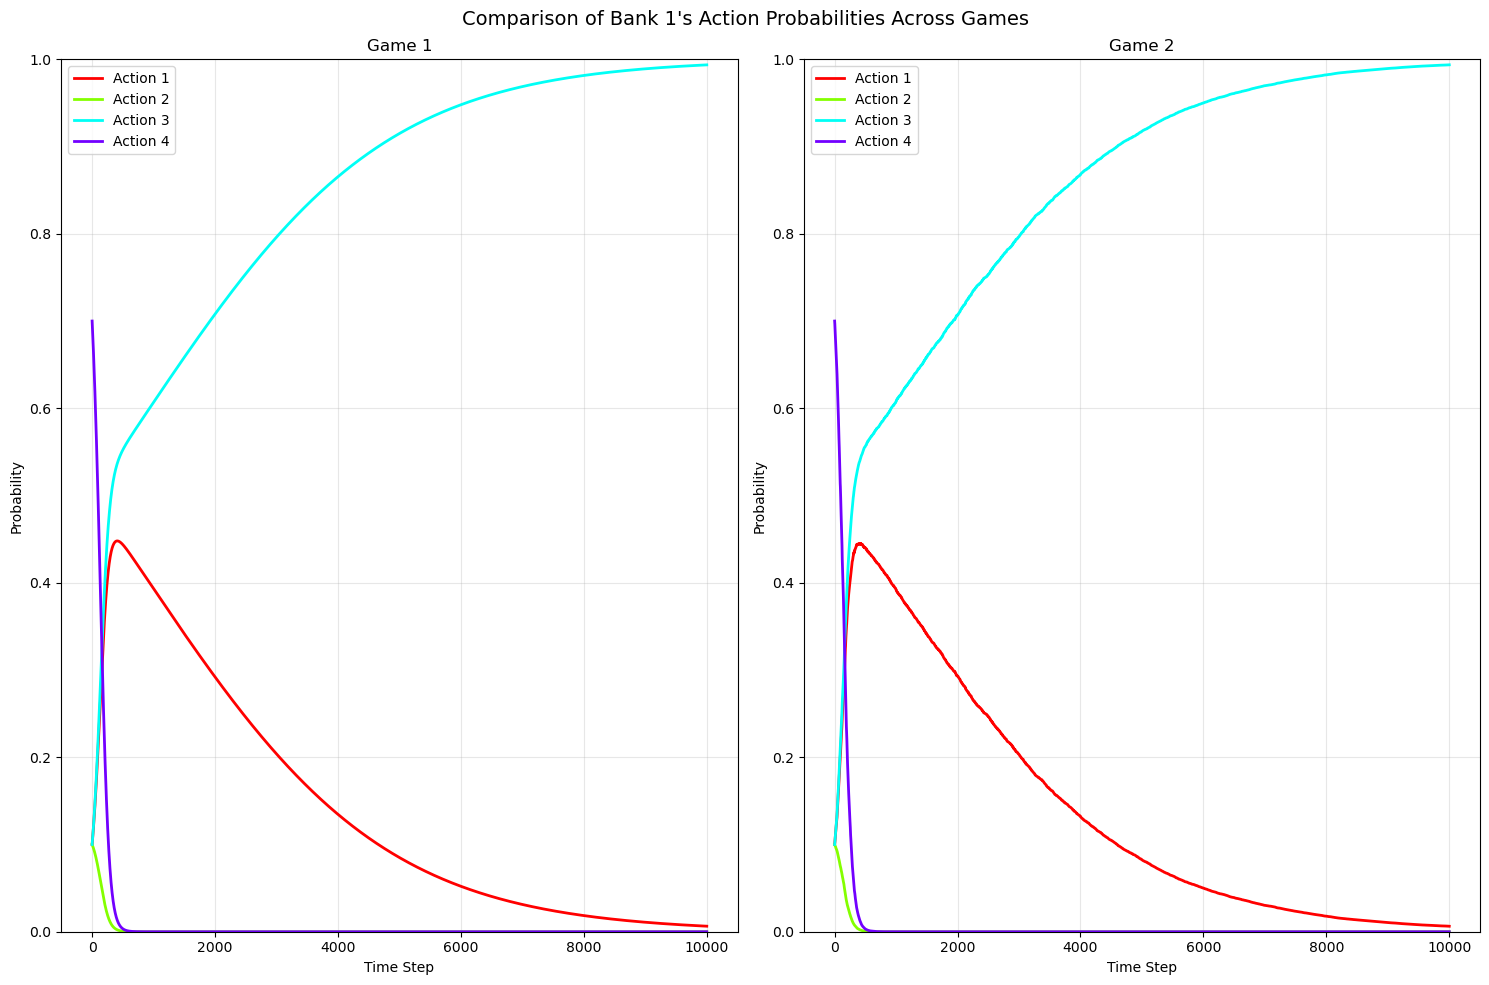

In [18]:
plot_game_probability_comparison(results) # 10 sample

(<Figure size 1500x1000 with 2 Axes>,
 array([[<Axes: title={'center': 'Game 1'}, xlabel='Time Step', ylabel='Probability'>,
         <Axes: title={'center': 'Game 2'}, xlabel='Time Step', ylabel='Probability'>]],
       dtype=object))

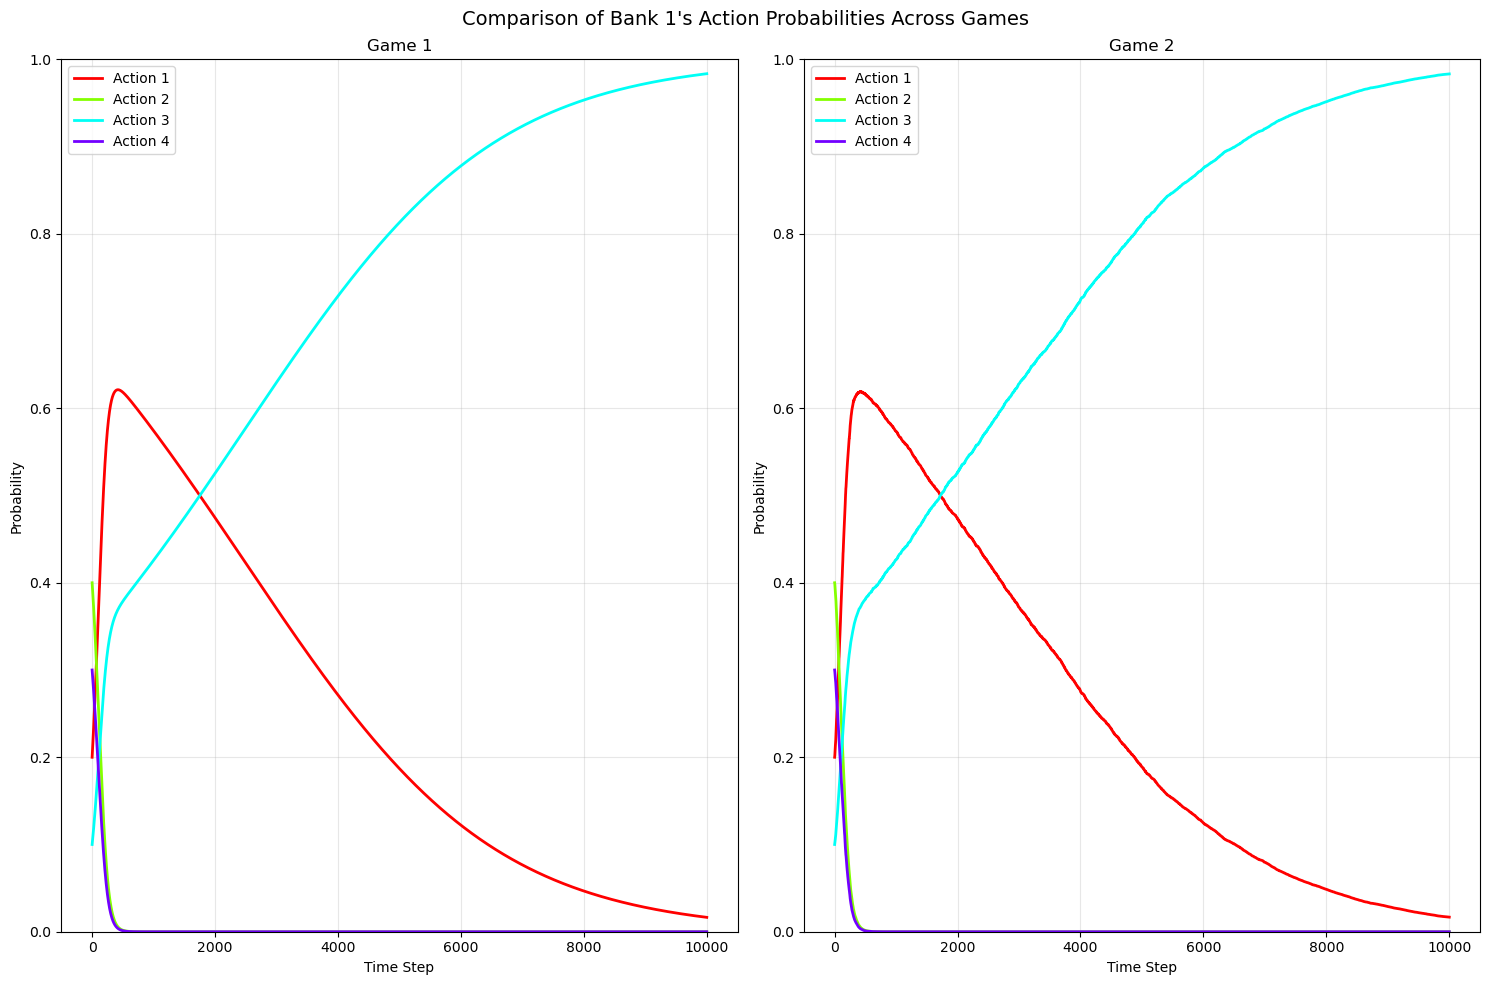

In [16]:
plot_game_probability_comparison(results) # 1 sample

In [11]:
T = 10000
results = []
p_b1=np.array([.1, .1, .1, .7])
p_b2=np.array([.2, .5, .2, .1])
# p_b1=np.array([.2, .4, .1, .3])

eta = 0.1
              

game_true = GameTrueMatrix(gammas=gammas, taus=taus, dist = tg)
results.append(game_true.run_hedge(T=T, p_b1=p_b1, p_b2=p_b2, eta=eta))

game_fresh_samp = GameFreshEstimate(gammas=gammas, taus=taus, dist = tg, num_samples = 1)
results.append(game_fresh_samp.run_hedge(T=T, p_b1=p_b1, p_b2=p_b2, eta=eta))


game_movingavg = GameMovingAvg(gammas=gammas, taus=taus, dist = tg, num_samples = 1)
results.append(game_movingavg.run_hedge(T=T, p_b1=p_b1, p_b2=p_b2, eta=eta))

(<Figure size 1500x1000 with 3 Axes>,
 array([[<Axes: title={'center': 'Game 1'}, xlabel='Time Step', ylabel='Probability'>,
         <Axes: title={'center': 'Game 2'}, xlabel='Time Step', ylabel='Probability'>,
         <Axes: title={'center': 'Game 3'}, xlabel='Time Step', ylabel='Probability'>]],
       dtype=object))

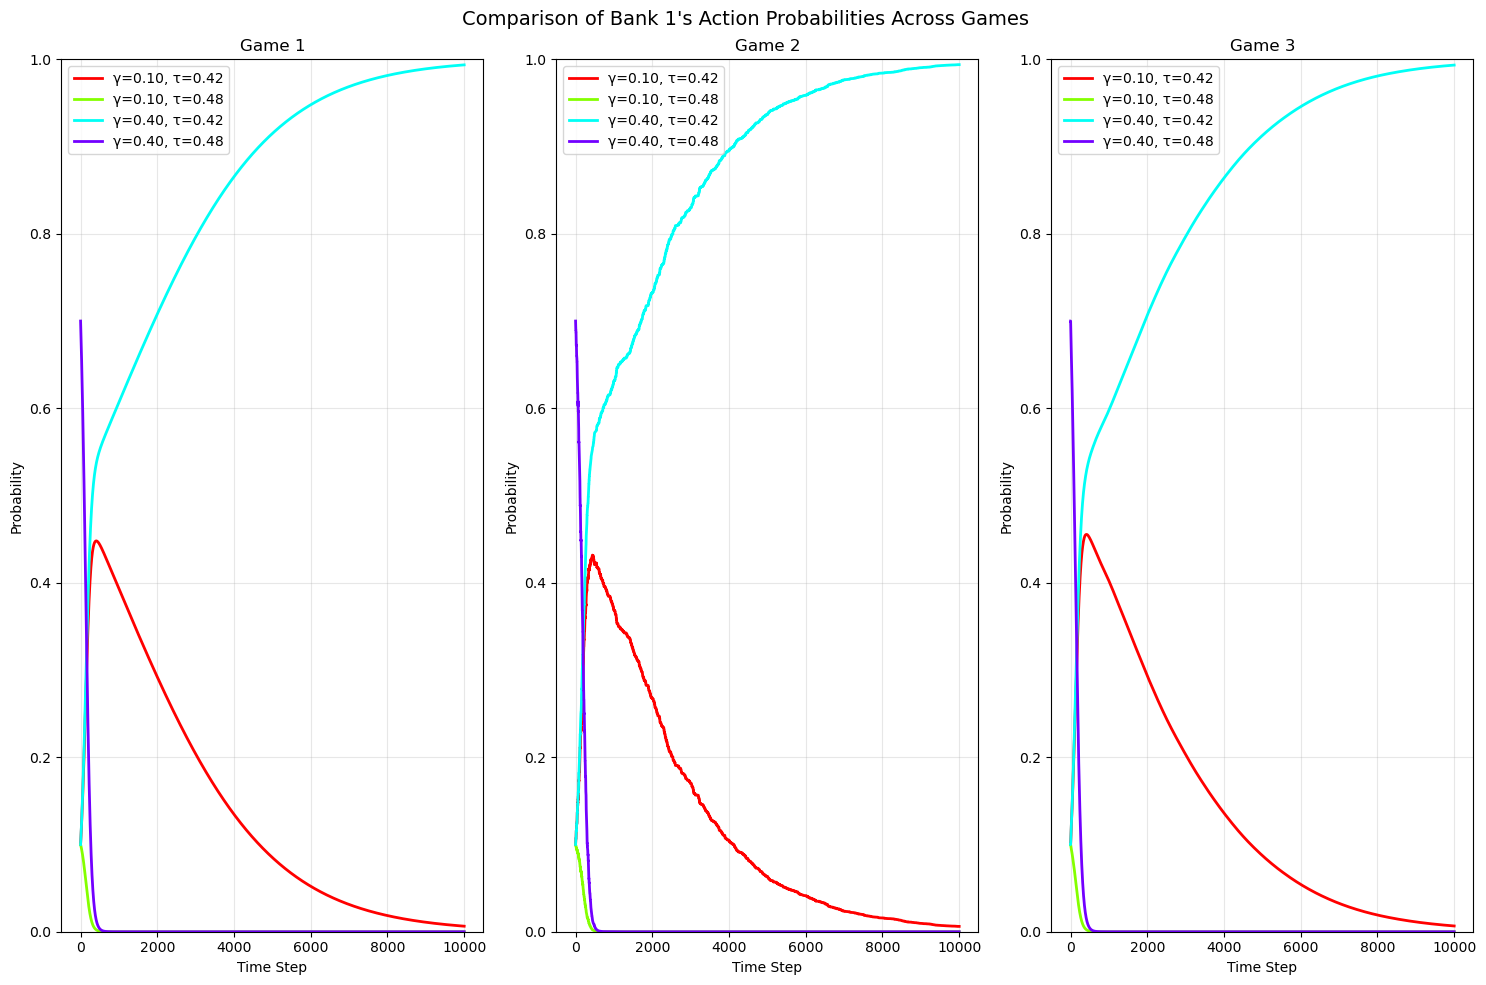

In [12]:
plot_game_probability_comparison(results) # 10 sample